<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import requests, bs4

result = requests.get(url)


In [3]:
result.text

'<!doctype html>\n<html>\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2019 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/slight.673caeca693d.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" type="text/css" href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/simple-grid.d1149de00d41.css"/>\n\n\n\n    <meta property="og:image" content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" />\n    <link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon" />\n    

In [0]:
Soup = bs4.BeautifulSoup(result.text)

In [5]:
Soup

<!DOCTYPE html>
<html>
<head>
<title>Talks | PyCon 2019 in Cleveland, Ohio</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet"/>
<link href="/2019/site_media/static/css/slight.673caeca693d.css" media="all" rel="stylesheet" type="text/css"/>
<link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/simple-grid.d1149de00d41.css" media="all" rel="stylesheet" type="text/css"/>
<meta content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" property="og:image"/>
<link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon"/>
<script src="//ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js"></script>
<script>
  

In [6]:
Soup.select('h2')

[<h2>
 <a href="/2019/schedule/presentation/235/" id="presentation-235">
         5 Steps to Build Python Native GUI Widgets for BeeWare
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/196/" id="presentation-196">
         8 things that happen at the dot:  Attribute Access &amp; Descriptors
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/210/" id="presentation-210">
         Account Security Patterns: How Logged-In Are you?
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/240/" id="presentation-240">
         Ace Your Technical Interview Using Python
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/161/" id="presentation-161">
         Advanced asyncio: Solving Real-world Production Problems
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/230/" id="presentation-230">
         A Guide to Software Engineering for Visually Impaired
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/157/" id="presentation-

In [7]:
len(Soup.select('h2'))

95

In [8]:
first = Soup.select('h2')[0]
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [9]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [10]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [11]:
last = Soup.select('h2')[-1]
last

<h2>
<a href="/2019/schedule/presentation/191/" id="presentation-191">
        Working with Time Zones: Everything You Wish You Didn't Need to Know
      </a>
</h2>

In [12]:
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [13]:
titles = [tag.text.strip()
          for tag in Soup.select('h2')]

titles

['5 Steps to Build Python Native GUI Widgets for BeeWare',
 '8 things that happen at the dot:  Attribute Access & Descriptors',
 'Account Security Patterns: How Logged-In Are you?',
 'Ace Your Technical Interview Using Python',
 'Advanced asyncio: Solving Real-world Production Problems',
 'A Guide to Software Engineering for Visually Impaired',
 'A Medieval DSL? Parsing Heraldic Blazons with Python!',
 'A New Era in Python Governance',
 'API Evolution the Right Way',
 'A Right Stitch-up: Creating embroidery patterns with Pillow',
 'A Snake in the Bits: Security Automation with Python',
 'Assets in Django without losing your hair',
 'Attracting the Invisible Contributors',
 'Beyond Two Groups: Generalized Bayesian A/B[/C/D/E...] Testing',
 'Break the Cycle: Three excellent Python tools to automate repetitive tasks',
 'Building a Culture of Observability',
 'Building an Open Source Artificial Pancreas',
 'Building reproducible Python applications for secured environments',
 'But, Why is 

In [14]:
type(titles), len(titles)

(list, 95)

In [15]:
titles[0], titles[-1]

('5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [16]:
long_titles = []
for title in titles:
  if len(title) > 80:
    long_titles.append(title)
    
long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [17]:
long_titles = [title for title in titles
               if len(title) > 80]

long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [18]:
def long(title):
  return len(title) > 80
  
long('Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline')

True

In [19]:
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [20]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [22]:
df = pd.DataFrame({'title': titles})

df.shape

(95, 1)

In [23]:
df[df['title'].str.len() > 80]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


In [24]:
condition = df['title'].str.len() > 80
df[condition]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [25]:
df['title length'] = df['title'].apply(len)

df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [26]:
df[ df['title length'] > 80]

,title,title length
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82
48,Lessons learned from building a community of Python users among thousands of analysts,85
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95
66,Put down the deep learning: When not to use neural networks and what to do instead,82
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90


In [27]:
df.loc[ df['title length'] > 80, 'title length']

30    89
38    81
43    82
48    85
50    82
60    95
66    82
84    90
Name: title length, dtype: int64

### long title

In [28]:
df['long title'] = df['title length'] > 80

df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [29]:
df[~df['long title']]

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False
5,A Guide to Software Engineering for Visually Impaired,53,False
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False
7,A New Era in Python Governance,30,False
8,API Evolution the Right Way,27,False
9,A Right Stitch-up: Creating embroidery patterns with Pillow,59,False


### first letter

In [0]:
df['first letter'] = df['title'].str[0]

In [31]:
df[df['first letter']=='P']

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [32]:
df[ df['title'].str.contains('Python') ]

,title,title length,long title,first letter
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5
3,Ace Your Technical Interview Using Python,41,False,A
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False,A
7,A New Era in Python Governance,30,False,A
10,A Snake in the Bits: Security Automation with Python,52,False,A
14,Break the Cycle: Three excellent Python tools to automate repetitive tasks,74,False,B
17,Building reproducible Python applications for secured environments,66,False,B
19,Coded Readers: Using Python to uncover surprising patterns in the books you love,80,False,C
20,Code Review Skills for Pythonistas,34,False,C
21,CUDA in your Python: Effective Parallel Programming on the GPU,62,False,C


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [33]:
!pip install textstat

In [34]:
import textstat

df['title word count'] = df['title'].apply(textstat.lexicon_count)

df.head()

,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [35]:
df[ df['title word count'] <= 3 ]

,title,title length,long title,first letter,title word count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [36]:
df = df.rename(columns={'title length':'title character count'})
df.head()

,title,title character count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [37]:
df.describe(include='all')

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,What is a PLC and how do I talk Python to it?,NaN,False,T,NaN
freq,1,NaN,87,12,NaN
mean,NaN,51.347368,NaN,NaN,7.978947
std,NaN,17.729509,NaN,NaN,3.218890
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,37.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [38]:
df.sort_values(by='title character count').head(5)['title']

64        Practical decorators
68       Python Security Tools
89     Type hinting (and mypy)
82     The Zen of Python Teams
56    Measuring Model Fairness
Name: title, dtype: object

Titles sorted reverse alphabetically

In [39]:
df.sort_values(by='first letter', ascending=False).head()

,title,title character count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [40]:
df['first letter'].value_counts().head()

T    12
A    11
P     8
M     8
E     7
Name: first letter, dtype: int64

Percentage of talks with long titles

In [41]:
df['long title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

In [42]:
(df['first letter']
  .value_counts()
  .head())

T    12
A    11
P     8
M     8
E     7
Name: first letter, dtype: int64

Histogram of title lengths, in characters

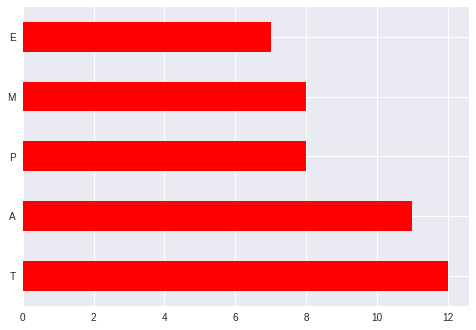

In [43]:
(df['first letter']
  .value_counts()
  .head()
  .plot
  .barh(color='red'
       ));

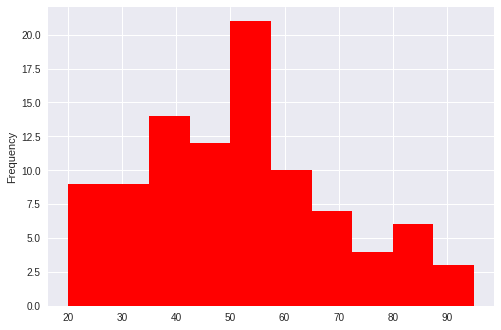

In [44]:
df['title character count'].plot.hist(color='red');

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

**Import libraries and brew soup**

In [0]:
import requests, bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textstat

url = 'https://us.pycon.org/2019/schedule/talks/list/'

result = requests.get(url)

soup = bs4.BeautifulSoup(result.text)



---



**Scrape descriptions**

Select the presentation description

In [0]:
soup.select('.presentation-description')

Check length

In [60]:
len(soup.select('.presentation-description'))

95

In [61]:
first = soup.select('.presentation-description')[0]
first.text.strip()

<div class="presentation-description">Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?

BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.

This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.</div>



---



**Create a new DataFrame column for description, description character count, and description word count**

In [0]:
description = [tag.text.strip()
          for tag in Soup.select('.presentation-description')]



df['descriptions'] = description

In [0]:
df['description character count'] = df['descriptions'].apply(len)

In [0]:
df['description word count'] = df['descriptions'].apply(textstat.lexicon_count)


In [0]:
df.head()



---



**Describe the DataFrames features**

In [68]:
df.describe(include = 'all')

,title,title character count,long title,first letter,title word count,descriptions,description character count,description word count
count,95,95.000000,95,95,95.000000,95,95.000000,95.000000
unique,95,NaN,2,22,NaN,95,NaN,NaN
top,What is a PLC and how do I talk Python to it?,NaN,False,T,NaN,"Deep learning is a useful tool for problems in computer vision, natural language processing, and medicine. While it might seem difficult to get started in deep learning, Python libraries, such as ...",NaN,NaN
freq,1,NaN,87,12,NaN,1,NaN,NaN
mean,NaN,51.347368,NaN,NaN,7.978947,NaN,813.073684,130.821053
std,NaN,17.729509,NaN,NaN,3.218890,NaN,415.988191,64.357872
min,NaN,20.000000,NaN,NaN,2.000000,NaN,121.000000,20.000000
25%,NaN,37.000000,NaN,NaN,6.000000,NaN,542.500000,85.500000
50%,NaN,52.000000,NaN,NaN,7.000000,NaN,718.000000,116.000000
75%,NaN,62.000000,NaN,NaN,9.500000,NaN,1016.500000,165.000000


Description Word Count

*   Average: 130.82
*   Min: 20
*   Max: 421





---



**Which descriptions would fit in a tweet (280 characters)**

In [70]:
df[ df['description character count'] <= 280 ]

,title,title character count,long title,first letter,title word count,descriptions,description character count,description word count
54,"Making Music with Python, SuperCollider and FoxDot",50,False,M,7,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20




---



**Description Grade Level**

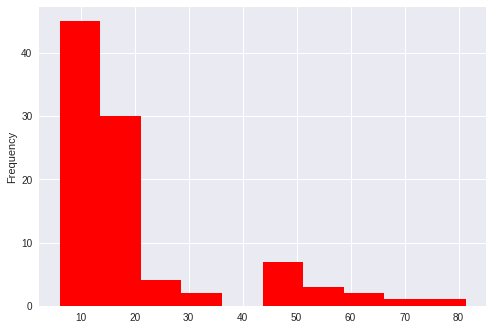

In [77]:
df['FK grade level'] = [textstat.flesch_kincaid_grade(desc)
          for desc in df['descriptions']]

df['FK grade level'].plot.hist(color='red');



---

